In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [3]:
iris = load_iris()

In [4]:
y = iris.target
x = iris.data

#作为数组，X是几维?
x.shape

(150, 4)

In [7]:
#作为数据表或特征矩阵，X是几维?
import pandas as pd

#pd. DataFrame(x)

In [11]:
#调用PCA
pca = PCA(n_components=2)#实例化
pca = pca.fit(x)#拟合模型

x_dr = pca.transform(x)#获取新矩阵
x_dr.shape

#fit_transform一步到位
#X_dr = PCA(2).fit_transform(x)

(150, 2)

In [13]:
x_dr[y == 0,0]

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978])

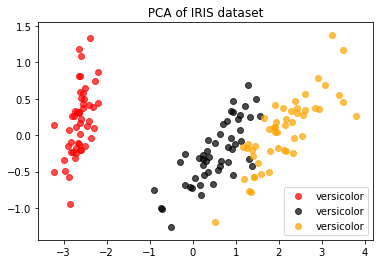

In [19]:
colors = ["red","black","orange"]

plt.figure()#现在我要画图了，给我一个画布吧

for i in [0,1,2]:
    plt.scatter(x_dr[y==i,0],x_dr[y==i,1],alpha=.7,c=colors[i],label=iris.target_names[1])

plt. legend()
plt.title( ' PCA of IRIS dataset ' )
plt.show( )

In [20]:
pca.explained_variance_   #每个新特征所带信息量大小

array([4.22824171, 0.24267075])

In [21]:
pca.explained_variance_ratio_    #新特征所占原信息量百分比

array([0.92461872, 0.05306648])

In [22]:
pca.explained_variance_ratio_.sum()

0.9776852063187949

In [32]:
pca_ = PCA().fit(x)
pca_.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [34]:
import numpy as np

np.cumsum(pca_.explained_variance_ratio_)

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

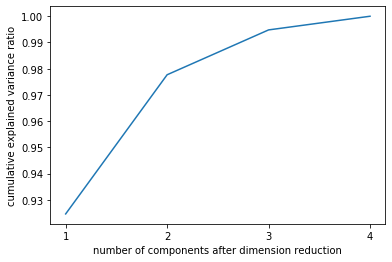

In [36]:
plt.plot([1,2,3,4],np.cumsum(pca_.explained_variance_ratio_))
plt.xticks([1,2,3,4])#这是为了限制坐标轴显示为整数
plt.xlabel( "number of components after dimension reduction")
plt.ylabel( "cumulative explained variance ratio")
plt.show()

In [40]:
#最大似然估计
pca_mle = PCA(n_components="mle")    #
pca_mle = pca_mle.fit(x)
x_mle = pca_mle.transform(x)
x_mle.shape

(150, 3)

In [49]:
#n_components信息量占比
pca_f = PCA(n_components=0.97,svd_solver="full")  #
pca_f = pca_f.fit(x)
x_f = pca_f.transform(x)
x_f.shape

(150, 2)

In [51]:
#SVD
PCA(2).fit(x).components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [52]:
PCA(2).fit(x).components_.shape

(2, 4)

In [54]:
from sklearn.datasets import fetch_lfw_people

In [ ]:
faces = fetch_lfw_people(min_faces_per_person=30)

In [ ]:
faces.shape

In [ ]:
faces.images.shape

In [ ]:
x = faces.data

In [ ]:
fig, axes = plt.subplots(3,8   #子图几行几列
                         ,figsize=(8,4)  
                         , subplot_kw = { "xticks":[], "yticks":[]}#不要是示坐标轴
                        )

In [ ]:
for i,ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:],cmap="gray") #cmap="gray"  灰色

In [ ]:
pca = PCA(150).fit(x)
V = pca.components_  #特征
V.shape

In [ ]:
fig, axes = plt.subplots(3,8   #子图几行几列
                         ,figsize=(8,4)  
                         , subplot_kw = { "xticks":[], "yticks":[]}#不要是示坐标轴
                        )

for i,ax in enumerate(axes.flat):
    ax.imshow(V[i,:,:].reshape(62,47),cmap="gray") #cmap="gray"  灰色

In [ ]:
x_dr = pca.fit_transform(x) #拟合提取结果
x_dr.shap

In [ ]:
x_inverse = pca.inversw_transform(x_dr)

In [ ]:
x_inverse.shape

In [ ]:
fig, axes = plt.subplots(2,10   #子图几行几列
                         ,figsize=(10,2.5)  
                         , subplot_kw = { "xticks":[], "yticks":[]}#不要是示坐标轴
                        )

for i in range(10):
    ax[0,i].imshow(faces.image[i,:,:],cmap="binary_r")
    ax[0,i].imshow(x_inverse[i].reshape(62,47),cmap="binary_r") 